In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf
from IPython.display import display
import sklearn
import math
import statsmodels.api as sm
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
os.getcwd()
os.chdir('/Users/kylehoward/desktop/thinkful/thinkful-2/capstone_1') 
os.getcwd()

/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


'/Users/kylehoward/Desktop/Thinkful/Thinkful-2/Capstone_1'

In [2]:
data = ("shot_logs.csv")
df = pd.read_csv(data, usecols=[4,5,6,7,8,9,10,11,12,13,16,17,18])

In [3]:
df.dropna()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,FGM,PTS
0,24,1,1,1:09,10.8,2,1.9,7.7,2,made,1.3,1,2
1,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,6.1,0,0
3,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,3.4,0,0
4,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,1.1,0,0
5,24,6,2,8:15,9.1,2,4.4,18.4,2,missed,2.6,0,0
6,24,7,4,10:15,14.5,11,9.0,20.7,2,missed,6.1,0,0
7,24,8,4,8:00,3.4,3,2.5,3.5,2,made,2.1,1,2
8,24,9,4,5:14,12.4,0,0.8,24.6,3,missed,7.3,0,0
9,1,1,2,11:32,17.4,0,1.1,22.4,3,missed,19.8,0,0
10,1,2,2,6:30,16.0,8,7.5,24.5,3,missed,4.7,0,0


In [4]:
df.describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,PTS
count,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,4.123015,0.452139,0.997314
std,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,2.756446,0.497706,1.130978
min,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,2.300000,0.000000,0.000000
50%,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,3.700000,0.000000,0.000000
75%,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,5.300000,1.000000,2.000000
max,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,53.200000,1.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 13 columns):
FINAL_MARGIN      128069 non-null int64
SHOT_NUMBER       128069 non-null int64
PERIOD            128069 non-null int64
GAME_CLOCK        128069 non-null object
SHOT_CLOCK        122502 non-null float64
DRIBBLES          128069 non-null int64
TOUCH_TIME        128069 non-null float64
SHOT_DIST         128069 non-null float64
PTS_TYPE          128069 non-null int64
SHOT_RESULT       128069 non-null object
CLOSE_DEF_DIST    128069 non-null float64
FGM               128069 non-null int64
PTS               128069 non-null int64
dtypes: float64(4), int64(7), object(2)
memory usage: 12.7+ MB


In [6]:
# Converting the data types and limiting defender distance to <= 10 ft
df['PTS_TYPE'].astype(int)
df['SHOT_DIST'].astype(int)
df['CLOSE_DEF_DIST'].astype(int)
df = df[df.CLOSE_DEF_DIST <= 10]
df.shape

(123743, 13)

In [7]:
# Creating some new features. The only one that seemed to be of value was ['DIST_DIST']
df['IS_THREE'] = np.where(df['PTS_TYPE']==3, 1, 0)
df['TOUCH_TIME_SQUARED'] = df['TOUCH_TIME'] ** 2
df['TOUCH_TIME_THIRD'] = df['TOUCH_TIME'] ** 3
df["DISTANCE_RECIP"] = df['CLOSE_DEF_DIST'] - 11
df["DISTANCE_RECIP"] = df['CLOSE_DEF_DIST'].abs()
df['DIST_DIST'] = df['DISTANCE_RECIP'] * df['SHOT_DIST']
df['DIST_SQR_DIST'] = df['DISTANCE_RECIP'] ** df['SHOT_DIST']
df.fillna(0, inplace=True)
print(df['DIST_SQR_DIST'])

0         7.539869e+00
1         1.400559e+22
2         3.450240e-01
3         1.384960e+09
4         1.422830e+00
5         4.320257e+07
6         1.804378e+16
7         1.342046e+01
8         1.728790e+21
10        2.926830e+16
11        5.333086e+03
12        2.094707e+04
13        9.708467e+16
14        3.262044e+16
15        3.021651e+18
16        2.041005e+18
17        1.299561e+18
19        6.596724e+13
20        3.157518e+11
21        6.909198e+10
22        2.082972e+14
23        1.357063e+16
24        1.044295e+14
25        1.388420e+19
26        2.280548e-02
27        9.776299e+10
28        1.840736e+16
29        3.279176e+04
30        6.340338e+03
32        7.274276e+12
              ...     
128038    1.225038e+07
128039    7.034599e+00
128040    5.873885e+01
128041    4.537523e-01
128042    4.884826e-01
128043    2.796586e+06
128044    3.298552e+04
128045    4.304558e+00
128046    2.865118e+09
128047    7.821215e+05
128049    2.063582e+07
128050    1.093777e+02
128051    8

In [8]:
#-----------------------------------KNN-----------------------------------------------
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'TOUCH_TIME_SQUARED', 'PERIOD', 'DIST_DIST']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
df.shape

(123743, 19)

In [9]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_training, y_training)
y_pred_test = knn.predict(X_test)


In [10]:
# Poor initial score so I will try a few others
score = cross_val_score(knn, X, y, cv=5)
print(knn.score(X_training, y_training))
print(score)

0.164849704949
[-0.02223767 -0.02094256 -0.03076347 -0.03052668 -0.02013076]


In [11]:
#--------------------------------------RFC--------------------------------------------

In [12]:
# Much better score. I will attempt to tune
rfc = ensemble.RandomForestClassifier()
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'TOUCH_TIME']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.56603722759475261

In [13]:
cross_val_score(rfc, X, y, cv=5)

array([ 0.56531577,  0.56588145,  0.56450766,  0.56449006,  0.56545984])

In [14]:
# ['TOUCH_TIME_SQUARED'] seems to actually make it worse
rfc = ensemble.RandomForestClassifier()
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'TOUCH_TIME_SQUARED']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.5631549174366296

In [15]:
cross_val_score(rfc, X, y, cv=5)

array([ 0.56373995,  0.56576023,  0.56103277,  0.56521739,  0.56255051])

In [16]:
# After tuning in multiple directions I settled on a depth of 6
rfc = ensemble.RandomForestClassifier(max_depth=6)
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'TOUCH_TIME']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.61546749993265626

In [17]:
cross_val_score(rfc, X, y, cv=5)

array([ 0.62515657,  0.61687341,  0.6175199 ,  0.61435267,  0.61576693])

In [18]:
# Adding ['PERIOD'] helps slightly. It could mean that players are more warmed up later, 
# have more energy earlier, or care more late in the game.
rfc = ensemble.RandomForestClassifier(max_depth=6)
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'TOUCH_TIME', 'PERIOD']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.61740699835681379

In [19]:
cross_val_score(rfc, X, y, cv=5)

array([ 0.6253586 ,  0.62046951,  0.61719665,  0.61512041,  0.61532245])

In [20]:
# Dribbles seems to make it worse
rfc = ensemble.RandomForestClassifier(n_estimators=25, max_depth=6)
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'TOUCH_TIMED', 'PERIOD', 'DRIBBLES']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.61627562427605531

In [21]:
cross_val_score(rfc, X, y, cv=5)

array([ 0.62584347,  0.61921694,  0.61756031,  0.61314046,  0.61681752])

In [22]:
# Seeing if I can manipulate dribbles 
df['DRIBBLES_SQUARED'] = df['DRIBBLES'] ** 2
df['DRIBBLES_SQRT'] = df['DRIBBLES'] ** .5
df['DRIBBLES_THIRD'] = df['DRIBBLES'] ** 3
df['DRIBBLES_LOG'] = np.log(df.DRIBBLES)
df['DRIBBLES-TT'] = df['DRIBBLES'] * df['TOUCH_TIME_SQUARED']
df['TT_SQ_DR'] = df['TOUCH_TIME'] ** df['DRIBBLES']
df.head


/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


<bound method NDFrame.head of         FINAL_MARGIN  SHOT_NUMBER  PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES  \
0                 24            1       1       1:09        10.8         2   
1                 24            2       1       0:14         3.4         0   
2                 24            3       1       0:00         0.0         3   
3                 24            4       2      11:47        10.3         2   
4                 24            5       2      10:34        10.9         2   
5                 24            6       2       8:15         9.1         2   
6                 24            7       4      10:15        14.5        11   
7                 24            8       4       8:00         3.4         3   
8                 24            9       4       5:14        12.4         0   
10                 1            2       2       6:30        16.0         8   
11                 1            3       4      11:32        12.1        14   
12                 1            4 

In [23]:
# Manipulated different['DRIBBLES'] features and none added value
rfc = ensemble.RandomForestClassifier(max_depth=6)
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'TOUCH_TIME_SQUARED', 'PERIOD', 'DRIBBLES']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.61643724914473508

In [24]:
# ['DIST_DIST'] seems to help
rfc = ensemble.RandomForestClassifier(max_depth=6)
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'TOUCH_TIME_SQUARED', 'PERIOD', 'DIST_DIST']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.61727231096624735

In [25]:
# More feature experimentation
rfc = ensemble.RandomForestClassifier(max_depth=6)
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'DRIBBLES-TT', 'PERIOD', 'FINAL_MARGIN']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.61614093688548877

In [26]:
# More feature experimentation
rfc = ensemble.RandomForestClassifier(max_depth=6)
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'DRIBBLES-TT', 'PERIOD', 'IS_THREE']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.6156021873232228

In [29]:
df['S_IS_CLOSE'] = np.where(df['SHOT_DIST']<=6, 1, 0)
df['S_IS_SHORT'] = np.where((df['SHOT_DIST']<=12) & (df['SHOT_DIST']>6), 1, 0)
df['S_IS_MID'] = np.where((df['SHOT_DIST']<=18) & (df['SHOT_DIST']>12), 1, 0)
df['S_IS_LONG'] = np.where(df['SHOT_DIST']>18, 1, 0)
df.shape

(123743, 30)

In [30]:
# We will cap it at two standard deviations and round up to ten. I would sometimes say that 
# even ten feet is a bit long but this could help decide between an open three in transition
# or getting closer for a more contested shot.
df['CLOSE_DEF_DIST'].describe()

count    123743.000000
mean          3.796704
std           2.037775
min           0.000000
25%           2.200000
50%           3.600000
75%           5.100000
max          10.000000
Name: CLOSE_DEF_DIST, dtype: float64

In [31]:
# Trying out categorical variables to see if we can increase accuracy
df['D_!'] = np.where(df['CLOSE_DEF_DIST']<=2, 1, 0)
df['D_2'] = np.where((df['CLOSE_DEF_DIST']<=4) & (df['CLOSE_DEF_DIST']>2), 1, 0)
df['D_3'] = np.where((df['CLOSE_DEF_DIST']<=6) & (df['CLOSE_DEF_DIST']>4), 1, 0)
df['D_4'] = np.where((df['CLOSE_DEF_DIST']<=8) & (df['CLOSE_DEF_DIST']>6), 1, 0)
df['D_5'] = np.where((df['CLOSE_DEF_DIST']<=10) & (df['CLOSE_DEF_DIST']>8), 1, 0)

df.head()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,PREDICTION,S_IS_CLOSE,S_IS_SHORT,S_IS_MID,S_IS_LONG,D_!,D_2,D_3,D_4,D_5
0,24,1,1,1:09,10.8,2,1.9,7.7,2,made,...,0.372542,0,1,0,0,1,0,0,0,0
1,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,...,0.263375,0,0,0,1,0,0,0,1,0
2,24,3,1,0:00,0.0,3,2.7,10.1,2,missed,...,0.360568,0,1,0,0,1,0,0,0,0
3,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,...,0.388756,0,0,1,0,0,1,0,0,0
4,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,...,0.488420,1,0,0,0,1,0,0,0,0


In [32]:
# Good but still below best model
rfc = ensemble.RandomForestClassifier(max_depth=6)
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'DIST_DIST', 'SHOT_DIST', 'DRIBBLES-TT', 'PERIOD', 'IS_THREE', 'D_!', 'D_2', 'D_3', 'D_4', 'D_5', 'S_IS_CLOSE', 'S_IS_SHORT', 'S_IS_MID', 'S_IS_LONG']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.61643724914473508

In [33]:
# Worse then previous
rfc = ensemble.RandomForestClassifier(max_depth=6)
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'DRIBBLES-TT', 'PERIOD', 'IS_THREE']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.61401287611453814

In [49]:
# All new categorical variables paired with five previous best performing
rfc = ensemble.RandomForestClassifier(max_depth=6)
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'TOUCH_TIME_SQUARED', 'PERIOD', 'DIST_DIST', 'D_!', 'D_2', 'D_3', 'D_4', 'D_5', 'S_IS_CLOSE', 'S_IS_SHORT', 'S_IS_MID', 'S_IS_LONG']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.61786493548473986

In [50]:
cross_val_score(rfc, X, y, cv=5)

array([ 0.62766172,  0.61917653,  0.61663097,  0.61043317,  0.61467593])

In [40]:
# Just new categorical
rfc = ensemble.RandomForestClassifier(max_depth=6)
y = df['FGM']
X = df[['D_!', 'D_2', 'D_3', 'D_4', 'D_5', 'S_IS_CLOSE', 'S_IS_SHORT', 'S_IS_MID', 'S_IS_LONG']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.6095681922258438

In [83]:
# Best five without categorical is basically identical to with. I will drop new variables
# for feature reduction sake
rfc = ensemble.RandomForestClassifier(n_estimators=30, max_depth=6)
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'TOUCH_TIME_SQUARED', 'PERIOD', 'DIST_DIST']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test)  

0.61794574791907986

In [84]:
cross_val_score(rfc, X, y, cv=5)

array([ 0.6260859 ,  0.62002505,  0.61719665,  0.6145143 ,  0.61649426])

In [85]:
confusion_matrix(y_test, y_pred_test)

array([[17605,  2907],
       [11276,  5335]])

In [86]:
# Feature stregnth. ['SHOT_DIST'] is most successful with ['DIST_DIST'] following
importances = rfc.feature_importances_
print(importances)

[ 0.17885522  0.43729981  0.1257393   0.0053385   0.25276717]


In [72]:
# Attempt to reduce features further
rfc = ensemble.RandomForestClassifier(max_depth=6)
y = df['FGM']
X = df[['SHOT_DIST', 'DIST_DIST']]
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
rfc.fit(X_training, y_training)
y_pred_test = rfc.predict(X_test)
rfc.score(X_test, y_test) 

0.61199256525604073

In [63]:
# Comparing our model to season long FG%
hit = df["FGM"].sum()
tot = len(df['FGM'])
percent = hit / tot
print(percent)

0.4512820927244369


In [27]:
# Creating predictions per shot so we can evaluate shot quality as a side effect
predictions = rfc.predict_proba(X)
print(predictions)

[[ 0.62745785  0.37254215]
 [ 0.73662494  0.26337506]
 [ 0.63943218  0.36056782]
 ..., 
 [ 0.5958474   0.4041526 ]
 [ 0.62216364  0.37783636]
 [ 0.58820673  0.41179327]]


In [28]:
# Adding the prediction of shot made to the DF
prediction = []
for pred in predictions:
    pred = pred[1]
    prediction.append(pred)
df['PREDICTION'] = prediction
df.head(50)

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,...,DISTANCE_RECIP,DIST_DIST,DIST_SQR_DIST,DRIBBLES_SQUARED,DRIBBLES_SQRT,DRIBBLES_THIRD,DRIBBLES_LOG,DRIBBLES-TT,TT_SQ_DR,PREDICTION
0,24,1,1,1:09,10.8,2,1.9,7.7,2,made,...,1.3,10.01,7.539869e+00,4,1.414214,8,0.693147,7.22,3.610000e+00,0.372542
1,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,...,6.1,172.02,1.400559e+22,0,0.000000,0,-inf,0.00,1.000000e+00,0.263375
2,24,3,1,0:00,0.0,3,2.7,10.1,2,missed,...,0.9,9.09,3.450240e-01,9,1.732051,27,1.098612,21.87,1.968300e+01,0.360568
3,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,...,3.4,58.48,1.384960e+09,4,1.414214,8,0.693147,7.22,3.610000e+00,0.388756
4,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,...,1.1,4.07,1.422830e+00,4,1.414214,8,0.693147,14.58,7.290000e+00,0.488420
5,24,6,2,8:15,9.1,2,4.4,18.4,2,missed,...,2.6,47.84,4.320257e+07,4,1.414214,8,0.693147,38.72,1.936000e+01,0.354062
6,24,7,4,10:15,14.5,11,9.0,20.7,2,missed,...,6.1,126.27,1.804378e+16,121,3.316625,1331,2.397895,891.00,3.138106e+10,0.410040
7,24,8,4,8:00,3.4,3,2.5,3.5,2,made,...,2.1,7.35,1.342046e+01,9,1.732051,27,1.098612,18.75,1.562500e+01,0.518778
8,24,9,4,5:14,12.4,0,0.8,24.6,3,missed,...,7.3,179.58,1.728790e+21,0,0.000000,0,-inf,0.00,1.000000e+00,0.351009
10,1,2,2,6:30,16.0,8,7.5,24.5,3,missed,...,4.7,115.15,2.926830e+16,64,2.828427,512,2.079442,450.00,1.001129e+07,0.340485


In [318]:
#-------------------------Statsmodels Logistic regression------------------------------------
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'TOUCH_TIME_SQUARED', 'PERIOD', 'DIST_DIST']]
X['intercept'] = 1 
logit = sm.Logit(df['FGM'], X)
result = logit.fit()
print(result.summary())

/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Optimization terminated successfully.
         Current function value: 0.659945
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    FGM   No. Observations:               123743
Model:                          Logit   Df Residuals:                   123737
Method:                           MLE   Df Model:                            5
Date:                Fri, 08 Sep 2017   Pseudo R-squ.:                 0.04132
Time:                        12:32:38   Log-Likelihood:                -81664.
converged:                       True   LL-Null:                       -85184.
                                        LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
CLOSE_DEF_DIST         0.2571      0.007     36.615      0.000       0.243       0.271
SHOT_

In [319]:
pred = result.predict(X)
pred_y = np.where(pred < .5, 0, 1)
table = pd.crosstab(df['FGM'], pred_y)

print('\n FG accuracy')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 FG accuracy
col_0      0      1
FGM                
0      50173  17727
1      31089  24754

 Percentage accuracy
0.605504957856


In [322]:
#-------------------------Sklearn Logistic regression------------------------------------
lr = LogisticRegression()
y = df['FGM']
X = df[['CLOSE_DEF_DIST', 'SHOT_DIST', 'TOUCH_TIME_SQUARED', 'PERIOD', 'DIST_DIST']]
fit = lr.fit(X, y)
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)
print('\n FGM')
print(pd.crosstab(pred_y_sklearn, y))
print('\n Percentage accuracy')
print(lr.score(X, y))


Coefficients
[[ 0.25706049 -0.04482641 -0.00167868 -0.00522617 -0.00644886]]
[-0.1462725]

 FGM
FGM        0      1
row_0              
0      50175  31088
1      17725  24755

 Percentage accuracy
0.605529201652


In [323]:
#-------------------------------SVC--------------------------------
svm = SVC()
X_training = X[:86620]
y_training = y[:86620]
X_test = X[86620:]
y_test = y[86620:]
svm.fit(X_training, y_training)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
y_pred_test= svm.predict(X_test)
print(y_pred_test)

[0 0 1 ..., 0 0 1]


In [324]:
svm.score(X_test, y_test)

0.60154082374808071

In [ ]:
#----------------------Visuailzations----------------------------

In [96]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3,
)
decision_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

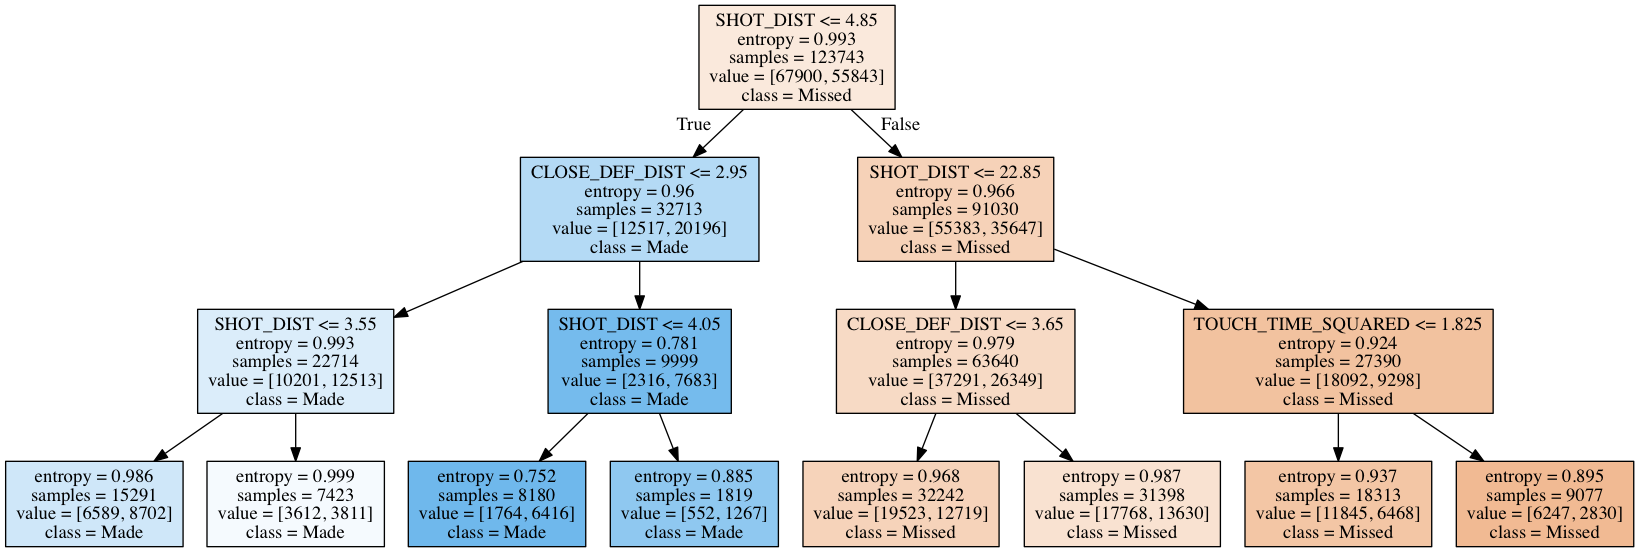

In [97]:
# My concern with this is that it is half of the depth of the actual model but that tree 
# is too wide to fit on a slide
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Missed', 'Made'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

(array([ 31971.,  22438.,  10202.,  14777.,  20425.,  23077.,    568.,
           139.,    104.,     42.]),
 array([  0.  ,   4.72,   9.44,  14.16,  18.88,  23.6 ,  28.32,  33.04,
         37.76,  42.48,  47.2 ]),
 <a list of 10 Patch objects>)

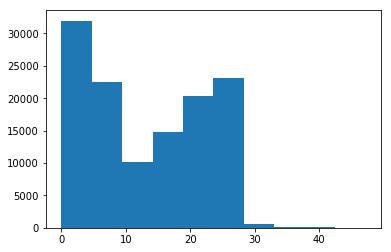

In [88]:
# Will make these more visually appealing if i end up using them
z = df['SHOT_DIST']
plt.hist(z)

(array([  7249.,  16219.,  24566.,  21958.,  20396.,  14782.,   8838.,
          4969.,   2845.,   1921.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

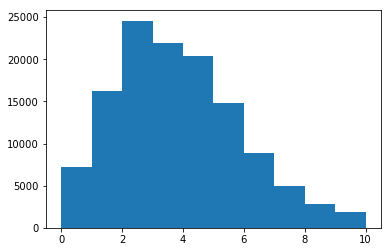

In [92]:
z = df['CLOSE_DEF_DIST']
plt.hist(z)

(array([  6.24490000e+04,   1.97180000e+04,   2.17020000e+04,
          1.30970000e+04,   5.10100000e+03,   1.53800000e+03,
          9.20000000e+01,   3.20000000e+01,   1.00000000e+01,
          4.00000000e+00]),
 array([   0.   ,   42.206,   84.412,  126.618,  168.824,  211.03 ,
         253.236,  295.442,  337.648,  379.854,  422.06 ]),
 <a list of 10 Patch objects>)

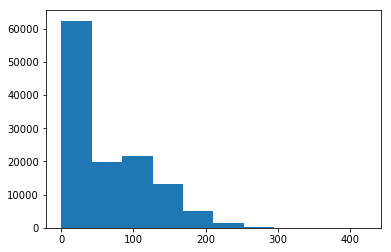

In [98]:
z = df['DIST_DIST']
plt.hist(z)

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.37000000e+02,   1.21148000e+05,
          2.35600000e+03]),
 array([-100.5 ,  -87.96,  -75.42,  -62.88,  -50.34,  -37.8 ,  -25.26,
         -12.72,   -0.18,   12.36,   24.9 ]),
 <a list of 10 Patch objects>)

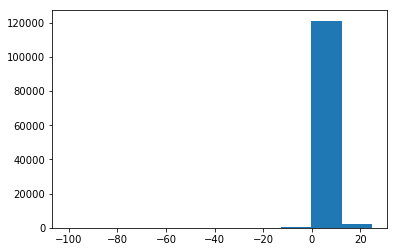

In [101]:
z = df['TOUCH_TIME']
plt.hist(z)

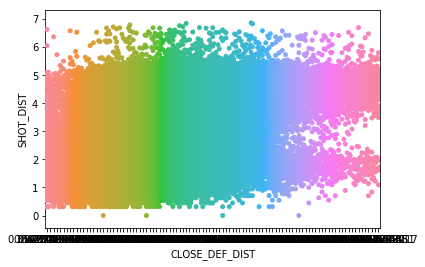

In [94]:
# Not sure how to visualize these two features
outcome = df['CLOSE_DEF_DIST'] ** .5
feature = df['SHOT_DIST'] ** .5

sns.swarmplot(outcome, feature)

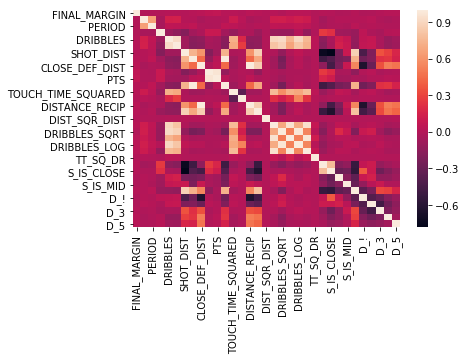

In [95]:
sns.heatmap(df.corr())